Agricultural Analysis Part 2: Python
By Gehrman Kosenkov



-----------PROJECT DESCRIPTION-----------

DISCLAIMER 

Beware that even though the project results were shared with one of my previous employers, namely AlmaStone*, this file mainly aims to demonstrate my data analysis skills rather than provide commercially valuable insights. 

AlmaStone* is a UK based commodity trade finance fund focused on emerging markets.

OVERALL PROJECT OBJECTIVES:

1) Reveal relevant countries which agricultural sectors have great potential for investment 
2) Analyze certain factors that might presumably affect agricultural production of those countries. 

PROJECT STRUCTURE

The project was divided into two parts: Part 1 -SQL and Part 2 -Python.

This file describes Part-2 Python. Link to Part-1 SQL can be found in my portfolio.

-----------AGRICULTURAL ANALYSIS PART 2: PYTHON-----------

STAGES

1.Import Of The Table "Grains_Pulses_Meals_USDA" Produced In MySQL
2.Grains_Pulses_Meals_USDA:Data Exploration,Cleaning And Organization
3.Grains_Pulses_Meals_USDA: Analysis Of Key Corn Exporters 
4.Importing Table "Fertilizer_Use_USA" containing data on annual fertilizer use in USA 
5.Fertilizer_Use_USA: Data Exploration, Cleaning And Organization
6.Combining Fertilizer_Use_USA With Grains_Pulses_Meals_USDA into New_Grains_Pulses_Meals_USDA
7.New_Grains_Pulses_Meals_USDA: Statistical Analysis, Multiple Linear Regression, Scatter Plots, Pearson Coefficient 
8.Conclusions


DATA SOURCES

-Table "Grains_Pulses_Meals_USDA" Produced In MySQL In Part 1 Of This Project 
-Table "Fertilizer_Use_USA" downloaded from USDA website 

SKILLS USED:

Pandas, Numpy, Seaborn, Matplotlib, Scipy, Sklearn, Statistical Analysis, Multiple Linear Regression, Scatter Plots, Pearson Coefficient 

1.Import Of "Grains_Pulses_Meals_USDA"

In [385]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

In [386]:
Grains_Pulses_Meals_USDA = pd.read_csv('/Users/germankosenkov/Desktop/work:domestic/Data Analysis Projects Chosen/Python/Grains_Pulses_Meals_USDA.csv',sep=',',)

/var/folders/qs/26crv4l161g4k3cvlckx2s5h0000gn/T/ipykernel_25187/1613126619.py:1: DtypeWarning: Columns (10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  Grains_Pulses_Meals_USDA = pd.read_csv('/Users/germankosenkov/Desktop/work:domestic/Data Analysis Projects Chosen/Python/Grains_Pulses_Meals_USDA.csv',sep=',',)


In [387]:
Grains_Pulses_Meals_USDA

#The number of rows and columns matches the SQL table which means the import went smoothly. 

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Volume,Unit_Description,Average_Production_2000_2022,Above_Or_Below_Average,Annual_Precipitation
0,813700,"Meal, Copra",AS,Australia,1964,6,20,Beginning Stocks,8,0,MT,NaN,NaN,NaN
1,813700,"Meal, Copra",AS,Australia,1964,6,125,Domestic Consumption,8,11000,MT,NaN,NaN,NaN
2,813700,"Meal, Copra",AS,Australia,1964,6,176,Ending Stocks,8,0,MT,NaN,NaN,NaN
3,813700,"Meal, Copra",AS,Australia,1964,6,88,Exports,8,0,MT,NaN,NaN,NaN
4,813700,"Meal, Copra",AS,Australia,1964,6,57,Imports,8,0,MT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289185,422110,"Rice, Milled",JM,Jamaica,2013,5,28,Production,8,0,NaN,NaN,NaN,NaN
289186,422110,"Rice, Milled",JM,Jamaica,2013,5,178,Total Distribution,8,82000,NaN,NaN,NaN,NaN
289187,422110,"Rice, Milled",JM,Jamaica,2013,5,86,Total Supply,8,82000,NaN,NaN,NaN,NaN
289188,422110,"Rice, Milled",JM,Jamaica,2014,5,20,Beginning Stocks,8,0,NaN,NaN,NaN,NaN


2.Grains_Pulses_Meals_USDA:Data Exploration,Cleaning And Organization

In [388]:
# Checking datatypes

Grains_Pulses_Meals_USDA.dtypes

#Looks like evertything is correct 

Commodity_Code                    int64
Commodity_Description            object
Country_Code                     object
Country_Name                     object
Market_Year                       int64
Month                             int64
Attribute_ID                      int64
Attribute_Description            object
Unit_ID                           int64
Volume                            int64
Unit_Description                 object
Average_Production_2000_2022    float64
Above_Or_Below_Average           object
Annual_Precipitation            float64
dtype: object

In [389]:
Grains_Pulses_Meals_USDA.describe(include='all')

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Volume,Unit_Description,Average_Production_2000_2022,Above_Or_Below_Average,Annual_Precipitation
count,289190.000000,289190,289110,289190,289190.000000,289190.000000,289190.000000,289190,289190.0,2.891900e+05,138228,1.341200e+04,6619,477.000000
unique,NaN,15,175,177,NaN,NaN,NaN,8,NaN,NaN,1,NaN,3,NaN
top,NaN,Corn,CH,China,NaN,NaN,NaN,Beginning Stocks,NaN,NaN,MT,NaN,BELOW AVERAGE,NaN
freq,NaN,54528,5208,5208,NaN,NaN,NaN,36150,NaN,NaN,138228,NaN,2881,NaN
mean,618340.866379,NaN,NaN,NaN,1992.180753,6.283931,94.749950,NaN,8.0,1.333559e+06,NaN,1.212406e+06,NaN,30.880503
std,186931.369591,NaN,NaN,NaN,16.716614,2.061931,57.049971,NaN,0.0,1.096788e+07,NaN,5.226408e+06,NaN,2.187718
min,422110.000000,NaN,NaN,NaN,1960.000000,1.000000,20.000000,NaN,8.0,0.000000e+00,NaN,0.000000e+00,NaN,26.000000
25%,440000.000000,NaN,NaN,NaN,1978.000000,5.000000,35.250000,NaN,8.0,0.000000e+00,NaN,1.272700e+04,NaN,30.000000
50%,459100.000000,NaN,NaN,NaN,1992.000000,6.000000,88.000000,NaN,8.0,2.500000e+04,NaN,5.450000e+04,NaN,31.000000
75%,813300.000000,NaN,NaN,NaN,2007.000000,7.000000,125.000000,NaN,8.0,2.260000e+05,NaN,2.870450e+05,NaN,32.000000


In [568]:
#Using subsetting to select only the columns needed for the analysis

Grains_Pulses_Meals_USDA = Grains_Pulses_Meals_USDA[[
 #'Commodity_Code',
 'Commodity_Description', 
 #'Country_Code',
 'Country_Name', 
 'Market_Year',
 #Month,
#'Attribute_ID',
'Attribute_Description', 
#Unit_ID,
'Volume',
#'Unit_Description',
'Average_Production_2000_2022', 
'Above_Or_Below_Average',
'Annual_Precipitation']].copy()

In [569]:
Grains_Pulses_Meals_USDA.columns

Index(['Commodity_Description', 'Country_Name', 'Market_Year',
       'Attribute_Description', 'Volume', 'Average_Production_2000_2022',
       'Above_Or_Below_Average', 'Annual_Precipitation'],
      dtype='object')

In [570]:
#Checking if there is any unexpected missing data

Grains_Pulses_Meals_USDA.isna().sum()

#Missing data was expected for Unit_Description, Average_Production_2000_2022, Above_Or_Below_Average, Annual_Precipitation (see Part 1 - SQL)

Commodity_Description                0
Country_Name                         0
Market_Year                          0
Attribute_Description                0
Volume                               0
Average_Production_2000_2022    275778
Above_Or_Below_Average          282571
Annual_Precipitation            288713
dtype: int64

In [571]:
#Checking for duplicated rows 

Grains_Pulses_Meals_USDA.loc[Grains_Pulses_Meals_USDA.duplicated()]

#No duplicated rows discovered

,Commodity_Description,Country_Name,Market_Year,Attribute_Description,Volume,Average_Production_2000_2022,Above_Or_Below_Average,Annual_Precipitation


In [595]:
#Checking for duplicates focusing on a particular set of columns

Grains_Pulses_Meals_USDA.loc[Grains_Pulses_Meals_USDA.duplicated(subset=['Commodity_Description', 'Country_Name', 'Market_Year','Attribute_Description', 'Volume'])]

#No duplicates discovered

,Commodity_Description,Country_Name,Market_Year,Attribute_Description,Volume,Average_Production_2000_2022,Above_Or_Below_Average,Annual_Precipitation


3.Grains_Pulses_Meals_USDA: Analysis Of Key Corn Exporters 

In [596]:
#There was a request from a senior colleague of mine to explore key exporting coutnries for corn. 

#For this purpose, I created a new dataframe focusing on exports of corn in 2020.


Exports_Grains_Pulses_Meals_USDA = Grains_Pulses_Meals_USDA.loc[(Grains_Pulses_Meals_USDA['Market_Year'] == 2020) & (Grains_Pulses_Meals_USDA['Attribute_Description'] == 'Exports') & (Grains_Pulses_Meals_USDA['Commodity_Description'] == 'Corn')]


Exports_Grains_Pulses_Meals_USDA.head(10)

,Commodity_Description,Country_Name,Market_Year,Attribute_Description,Volume,Average_Production_2000_2022,Above_Or_Below_Average,Annual_Precipitation
168983,Corn,Afghanistan,2020,Exports,0,NaN,NaN,NaN
169471,Corn,Albania,2020,Exports,0,NaN,NaN,NaN
169959,Corn,Algeria,2020,Exports,0,NaN,NaN,NaN
170439,Corn,Angola,2020,Exports,0,NaN,NaN,NaN
170927,Corn,Argentina,2020,Exports,34000000,NaN,NaN,NaN
171463,Corn,Australia,2020,Exports,50000,NaN,NaN,NaN
171735,Corn,Azerbaijan,2020,Exports,0,NaN,NaN,NaN
171831,Corn,Bangladesh,2020,Exports,200000,NaN,NaN,NaN
172103,Corn,Belarus,2020,Exports,50000,NaN,NaN,NaN
172591,Corn,Benin,2020,Exports,0,NaN,NaN,NaN


In [597]:
pd.set_option('display.max_rows', 150)

In [598]:
#Applying binning to reveal the leading corn exporters in 2020 

bins = np.linspace(min(Exports_Grains_Pulses_Meals_USDA['Volume']),max(Exports_Grains_Pulses_Meals_USDA['Volume']),4)

group_names = ["Low","Medium","High"]

Exports_Grains_Pulses_Meals_USDA["Volumes-Binned"] = pd.cut(Exports_Grains_Pulses_Meals_USDA["Volume"],bins,labels=group_names,include_lowest=True)

Exports_Grains_Pulses_Meals_USDA.sort_values(by=['Volumes-Binned'], ascending=False).head(10)

/var/folders/qs/26crv4l161g4k3cvlckx2s5h0000gn/T/ipykernel_25187/2309766510.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Exports_Grains_Pulses_Meals_USDA["Volumes-Binned"] = pd.cut(Exports_Grains_Pulses_Meals_USDA["Volume"],bins,labels=group_names,include_lowest=True)


,Commodity_Description,Country_Name,Market_Year,Attribute_Description,Volume,Average_Production_2000_2022,Above_Or_Below_Average,Annual_Precipitation,Volumes-Binned
219919,Corn,United States,2020,Exports,66043000,NaN,NaN,NaN,High
219215,Corn,Ukraine,2020,Exports,24000000,NaN,NaN,NaN,Medium
170927,Corn,Argentina,2020,Exports,34000000,NaN,NaN,NaN,Medium
174607,Corn,Brazil,2020,Exports,39000000,NaN,NaN,NaN,Medium
204479,Corn,Nepal,2020,Exports,0,NaN,NaN,NaN,Low
204967,Corn,New Zealand,2020,Exports,3000,NaN,NaN,NaN,Low
205455,Corn,Nicaragua,2020,Exports,5000,NaN,NaN,NaN,Low
205943,Corn,Nigeria,2020,Exports,100000,NaN,NaN,NaN,Low
206175,Corn,North Macedonia,2020,Exports,15000,NaN,NaN,NaN,Low
168983,Corn,Afghanistan,2020,Exports,0,NaN,NaN,NaN,Low


In [599]:
#Creating a list of leading corn exporters for 2020. The list would come in handy later.  

filt = (Exports_Grains_Pulses_Meals_USDA['Volumes-Binned']=='High') | (Exports_Grains_Pulses_Meals_USDA['Volumes-Binned']=='Medium')

Export_Leaders = Exports_Grains_Pulses_Meals_USDA.loc[filt]['Country_Name'].to_list()
print(Export_Leaders) 

['Argentina', 'Brazil', 'Ukraine', 'United States']


In [600]:
#Calculating % occupied by Export_Leaders in the global production. 

Production_Grains_Pulses_Meals_USDA = Grains_Pulses_Meals_USDA.loc[(Grains_Pulses_Meals_USDA['Market_Year'] == 2020) & (Grains_Pulses_Meals_USDA['Attribute_Description'] == 'Production') & (Grains_Pulses_Meals_USDA['Commodity_Description'] == 'Corn')]

Production_Grains_Pulses_Meals_USDA.head(10)

,Commodity_Description,Country_Name,Market_Year,Attribute_Description,Volume,Average_Production_2000_2022,Above_Or_Below_Average,Annual_Precipitation
168985,Corn,Afghanistan,2020,Production,230000,NaN,NaN,NaN
169473,Corn,Albania,2020,Production,375000,NaN,NaN,NaN
169961,Corn,Algeria,2020,Production,1000,NaN,NaN,NaN
170441,Corn,Angola,2020,Production,2100000,NaN,NaN,NaN
170929,Corn,Argentina,2020,Production,47500000,NaN,NaN,NaN
171465,Corn,Australia,2020,Production,370000,NaN,NaN,NaN
171737,Corn,Azerbaijan,2020,Production,285000,NaN,NaN,NaN
171833,Corn,Bangladesh,2020,Production,4600000,NaN,NaN,NaN
172105,Corn,Belarus,2020,Production,1200000,NaN,NaN,NaN
172593,Corn,Benin,2020,Production,1500000,NaN,NaN,NaN


In [601]:
#Calculating % occupied by Export_Leaders in the global production.

Sum = Production_Grains_Pulses_Meals_USDA['Volume'].sum()

Production_Grains_Pulses_Meals_USDA['Share_In_Global_Production'] = (Production_Grains_Pulses_Meals_USDA['Volume'].divide(other = Sum))*100

Filt = Production_Grains_Pulses_Meals_USDA['Country_Name'].isin(Export_Leaders)

Share_of_Export_Leaders_Production = Production_Grains_Pulses_Meals_USDA.loc[Filt]['Share_In_Global_Production'].sum().round(decimals = 1)

print('{}%'.format(Share_of_Export_Leaders_Production ))


48.1%


/var/folders/qs/26crv4l161g4k3cvlckx2s5h0000gn/T/ipykernel_25187/4068901704.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Production_Grains_Pulses_Meals_USDA['Share_In_Global_Production'] = (Production_Grains_Pulses_Meals_USDA['Volume'].divide(other = Sum))*100


In [602]:
#It would be interesting to compare the % of global production by Export_Leaders with their % of global exports and consumption 

Exports_Grains_Pulses_Meals_USDA = Grains_Pulses_Meals_USDA.loc[(Grains_Pulses_Meals_USDA['Market_Year'] == 2020) & (Grains_Pulses_Meals_USDA['Attribute_Description'] == 'Exports') & (Grains_Pulses_Meals_USDA['Commodity_Description'] == 'Corn')]

Exports_Grains_Pulses_Meals_USDA.head(10)

,Commodity_Description,Country_Name,Market_Year,Attribute_Description,Volume,Average_Production_2000_2022,Above_Or_Below_Average,Annual_Precipitation
168983,Corn,Afghanistan,2020,Exports,0,NaN,NaN,NaN
169471,Corn,Albania,2020,Exports,0,NaN,NaN,NaN
169959,Corn,Algeria,2020,Exports,0,NaN,NaN,NaN
170439,Corn,Angola,2020,Exports,0,NaN,NaN,NaN
170927,Corn,Argentina,2020,Exports,34000000,NaN,NaN,NaN
171463,Corn,Australia,2020,Exports,50000,NaN,NaN,NaN
171735,Corn,Azerbaijan,2020,Exports,0,NaN,NaN,NaN
171831,Corn,Bangladesh,2020,Exports,200000,NaN,NaN,NaN
172103,Corn,Belarus,2020,Exports,50000,NaN,NaN,NaN
172591,Corn,Benin,2020,Exports,0,NaN,NaN,NaN


In [603]:
#Calculating % occupied by Export_Leaders in the global exports

Sum_Exports = Exports_Grains_Pulses_Meals_USDA['Volume'].sum()

Exports_Grains_Pulses_Meals_USDA['Share_In_Global_Exports'] = (Exports_Grains_Pulses_Meals_USDA['Volume'].divide(other = Sum_Exports))*100

Filt_Exports = Exports_Grains_Pulses_Meals_USDA['Country_Name'].isin(Export_Leaders)

Share_of_Export_Leaders_In_Exports = Exports_Grains_Pulses_Meals_USDA.loc[Filt_Exports]['Share_In_Global_Exports'].sum().round(decimals = 1) 

print('{}%'.format(Share_of_Export_Leaders_In_Exports))

87.4%


/var/folders/qs/26crv4l161g4k3cvlckx2s5h0000gn/T/ipykernel_25187/2929788300.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Exports_Grains_Pulses_Meals_USDA['Share_In_Global_Exports'] = (Exports_Grains_Pulses_Meals_USDA['Volume'].divide(other = Sum_Exports))*100


In [604]:
#Calculating % occupied by Export_Leaders in the global consumption

Consumption_Grains_Pulses_Meals_USDA = Grains_Pulses_Meals_USDA.loc[(Grains_Pulses_Meals_USDA['Market_Year'] == 2020) & (Grains_Pulses_Meals_USDA['Attribute_Description'] == 'Domestic Consumption') & (Grains_Pulses_Meals_USDA['Commodity_Description'] == 'Corn')]

Consumption_Grains_Pulses_Meals_USDA.head(10)

,Commodity_Description,Country_Name,Market_Year,Attribute_Description,Volume,Average_Production_2000_2022,Above_Or_Below_Average,Annual_Precipitation
168981,Corn,Afghanistan,2020,Domestic Consumption,240000,NaN,NaN,NaN
169469,Corn,Albania,2020,Domestic Consumption,459000,NaN,NaN,NaN
169957,Corn,Algeria,2020,Domestic Consumption,5200000,NaN,NaN,NaN
170437,Corn,Angola,2020,Domestic Consumption,2300000,NaN,NaN,NaN
170925,Corn,Argentina,2020,Domestic Consumption,15000000,NaN,NaN,NaN
171461,Corn,Australia,2020,Domestic Consumption,310000,NaN,NaN,NaN
171733,Corn,Azerbaijan,2020,Domestic Consumption,350000,NaN,NaN,NaN
171829,Corn,Bangladesh,2020,Domestic Consumption,6100000,NaN,NaN,NaN
172101,Corn,Belarus,2020,Domestic Consumption,1250000,NaN,NaN,NaN
172589,Corn,Benin,2020,Domestic Consumption,1520000,NaN,NaN,NaN


In [605]:
#Calculating % occupied by Export_Leaders in the global consumption

Sum_Consumtpion = Consumption_Grains_Pulses_Meals_USDA['Volume'].sum()

Consumption_Grains_Pulses_Meals_USDA['Share_In_Global_Consumption'] = (Consumption_Grains_Pulses_Meals_USDA['Volume'].divide(other = Sum_Consumtpion))*100

Filt_Consumption = Consumption_Grains_Pulses_Meals_USDA['Country_Name'].isin(Export_Leaders)

Share_of_Export_Leaders_In_Consumption = Consumption_Grains_Pulses_Meals_USDA.loc[Filt_Consumption]['Share_In_Global_Consumption'].sum().round(decimals = 1) 

print('{}%'.format(Share_of_Export_Leaders_In_Consumption))

34.6%


/var/folders/qs/26crv4l161g4k3cvlckx2s5h0000gn/T/ipykernel_25187/458259506.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Consumption_Grains_Pulses_Meals_USDA['Share_In_Global_Consumption'] = (Consumption_Grains_Pulses_Meals_USDA['Volume'].divide(other = Sum_Consumtpion))*100


In [606]:
#For convenience, inserting all the data into a dataframe

Data = [[Share_of_Export_Leaders_Production,Share_of_Export_Leaders_In_Consumption, Share_of_Export_Leaders_In_Exports]]

Export_Leaders_Data = pd.DataFrame(Data, columns = ['% of Global Corn Production','% of Global Corn Consumption','% of Global Corn Exports'])

index = pd.Index(["Argentina, Brazil, Ukraine, United States"])

Export_Leaders_Data.set_index(index, inplace = True)

Export_Leaders_Data

,% of Global Corn Production,% of Global Corn Consumption,% of Global Corn Exports
"Argentina, Brazil, Ukraine, United States",48.1,34.6,87.4


4.Importing Table "Fertilizer_Use_USA"

In [607]:

#A senior colleague of mine requested me to add data on annual fertilizer use in USA. This data (along with annual precipitation) would be used as a predictor for corn production volumes in the US. 

#Importing the fertilizer fata 

xls = pd.ExcelFile('/Users/germankosenkov/Desktop/fertilizeruse.xls')

Fertilizer_Use_USA = pd.read_excel(xls, 'Table2')

Fertilizer_Use_USA.head(10)

,Unnamed: 0,Unnamed: 1,Table 2. Estimated U.S. plant nutrient use by selected crops 1/,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,Nitrogen,NaN,NaN,NaN,NaN,Phosphate,NaN,NaN,NaN,NaN,Potash,NaN,NaN,NaN,NaN
2,NaN,NaN,Year ending June 30,Corn,Cotton,Soybeans,Wheat,Other,Corn,Cotton,Soybeans,Wheat,Other,Corn,Cotton,Soybeans,Wheat,Other
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,--------------------------------------------...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,United States,Production,1964,1622.53695,394.107714,15.54329,353.23884,1967.373206,1052.50977,210.813876,57.0978,270.56592,1787,829.3698,175,70.42062,151.42784,1503
7,United States,Production,1965,2150.643,452.802838,19.37485,426.76584,1588.913472,1336.0055,229.621068,90.18112,326.9577,1529,1204.36008,177.469842,116.777505,150.572625,1185.319948
8,United States,Production,1966,2596.15811,330.352848,40.27752,424.1832,1935.328322,1626.16497,167.919015,164.83948,328.9584,1609,1512.7116,135.05967,183.48648,150.141375,1239.800875
9,United States,Production,1967,3044.05368,268.746624,55.717935,623.8736,2034.708161,1857.1716,145.52384,203.890905,462.77632,1635,1750.4376,103.9456,231.44373,222.98016,1332.99291


5.Fertilizer_Use_USA: Data Exploration, Cleaning And Organization

In [608]:
#Clearly, data needs exploration,cleaning and organization before being added to "Grains_Pulses_Meals_USDA"

Fertilizer_Use_USA = Fertilizer_Use_USA.rename(columns={'Unnamed: 0':'Country_Name', 'Unnamed: 1':'Attribute_Description','Table 2. Estimated U.S. plant nutrient use by selected crops 1/': 'Market_Year','Unnamed: 3':'Nitrogen_Use (1,000 nutrient short tons)','Unnamed: 8':'Phosphate_Use (1,000 nutrient short tons)','Unnamed: 13':'Potash_Use (1,000 nutrient short tons)'})

Fertilizer_Use_USA= Fertilizer_Use_USA[['Country_Name','Attribute_Description', 'Market_Year', 'Nitrogen_Use (1,000 nutrient short tons)', 'Phosphate_Use (1,000 nutrient short tons)','Potash_Use (1,000 nutrient short tons)']].copy()                          

Fertilizer_Use_USA

,Country_Name,Attribute_Description,Market_Year,"Nitrogen_Use (1,000 nutrient short tons)","Phosphate_Use (1,000 nutrient short tons)","Potash_Use (1,000 nutrient short tons)"
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,Nitrogen,Phosphate,Potash
2,NaN,NaN,Year ending June 30,Corn,Corn,Corn
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,--------------------------------------------...,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,United States,Production,1964,1622.53695,1052.50977,829.3698
7,United States,Production,1965,2150.643,1336.0055,1204.36008
8,United States,Production,1966,2596.15811,1626.16497,1512.7116
9,United States,Production,1967,3044.05368,1857.1716,1750.4376


In [609]:
#It can be seen from the above table that the first 6 rows and the last 3 rows were not needed. So I dropped them. 

Fertilizer_Use_USA.drop(Fertilizer_Use_USA.tail(3).index, inplace = True)

Fertilizer_Use_USA.drop([0,1,2,3,4,5], axis=0, inplace=True)

In [610]:
#Checking datatypes 

Fertilizer_Use_USA.dtypes


Country_Name                                 object
Attribute_Description                        object
Market_Year                                  object
Nitrogen_Use (1,000 nutrient short tons)     object
Phosphate_Use (1,000 nutrient short tons)    object
Potash_Use (1,000 nutrient short tons)       object
dtype: object

In [611]:
#Datatypes were displayed as objects whereas they should be numeric. This neeeded to be fixed. 

Fertilizer_Use_USA[["Market_Year", "Nitrogen_Use (1,000 nutrient short tons)","Phosphate_Use (1,000 nutrient short tons)","Potash_Use (1,000 nutrient short tons)"]] = Fertilizer_Use_USA[["Market_Year", "Nitrogen_Use (1,000 nutrient short tons)","Phosphate_Use (1,000 nutrient short tons)","Potash_Use (1,000 nutrient short tons)"]].apply(pd.to_numeric,errors='coerce')



In [612]:
#Now the datatypes are correct 

Fertilizer_Use_USA.dtypes

Country_Name                                  object
Attribute_Description                         object
Market_Year                                    int64
Nitrogen_Use (1,000 nutrient short tons)     float64
Phosphate_Use (1,000 nutrient short tons)    float64
Potash_Use (1,000 nutrient short tons)       float64
dtype: object

In [613]:
#NA values were filled in with average values

Fertilizer_Use_USA.fillna(Fertilizer_Use_USA.mean(), inplace = True)

Fertilizer_Use_USA

/var/folders/qs/26crv4l161g4k3cvlckx2s5h0000gn/T/ipykernel_25187/504097252.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Fertilizer_Use_USA.fillna(Fertilizer_Use_USA.mean(), inplace = True)


,Country_Name,Attribute_Description,Market_Year,"Nitrogen_Use (1,000 nutrient short tons)","Phosphate_Use (1,000 nutrient short tons)","Potash_Use (1,000 nutrient short tons)"
6,United States,Production,1964,1622.536950,1052.509770,829.369800
7,United States,Production,1965,2150.643000,1336.005500,1204.360080
8,United States,Production,1966,2596.158110,1626.164970,1512.711600
9,United States,Production,1967,3044.053680,1857.171600,1750.437600
10,United States,Production,1968,3115.627840,1854.788480,1777.939800
11,United States,Production,1969,3287.103600,1789.109760,1765.332080
12,United States,Production,1970,3519.668320,2136.272850,2046.007800
13,United States,Production,1971,3730.461910,2023.603120,1946.456960
14,United States,Production,1972,3705.355200,1993.642200,1991.628420
15,United States,Production,1973,3830.131530,1988.402560,2051.985200


In [614]:
#It was decided to create a column "Total_Annual_Fertilizer_Use_(MT)" which would be the sum of all three fertilizer types 

Fertilizer_Use_USA['Total_Annual_Fertilizer_Use (1,000 nutrient short tons)'] = Fertilizer_Use_USA.iloc[:, 3:6].sum(axis=1)

Fertilizer_Use_USA.head(5)

,Country_Name,Attribute_Description,Market_Year,"Nitrogen_Use (1,000 nutrient short tons)","Phosphate_Use (1,000 nutrient short tons)","Potash_Use (1,000 nutrient short tons)","Total_Annual_Fertilizer_Use (1,000 nutrient short tons)"
6,United States,Production,1964,1622.53695,1052.50977,829.36980,3504.41652
7,United States,Production,1965,2150.64300,1336.00550,1204.36008,4691.00858
8,United States,Production,1966,2596.15811,1626.16497,1512.71160,5735.03468
9,United States,Production,1967,3044.05368,1857.17160,1750.43760,6651.66288
10,United States,Production,1968,3115.62784,1854.78848,1777.93980,6748.35612


6.Combining Fertilizer_Use_USA With Grains_Pulses_Meals_USDA into New_Grains_Pulses_Meals_USDA

In [615]:
#Now the fertilizer table is ready to be added to "Grains_Pulses_Meals_USDA" 

New_Grains_Pulses_Meals_USDA = pd.merge(Grains_Pulses_Meals_USDA,Fertilizer_Use_USA,how="left", on = ["Market_Year", "Country_Name","Attribute_Description"])

New_Grains_Pulses_Meals_USDA

,Commodity_Description,Country_Name,Market_Year,Attribute_Description,Volume,Average_Production_2000_2022,Above_Or_Below_Average,Annual_Precipitation,"Nitrogen_Use (1,000 nutrient short tons)","Phosphate_Use (1,000 nutrient short tons)","Potash_Use (1,000 nutrient short tons)","Total_Annual_Fertilizer_Use (1,000 nutrient short tons)"
0,"Meal, Copra",Australia,1964,Beginning Stocks,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Meal, Copra",Australia,1964,Domestic Consumption,11000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Meal, Copra",Australia,1964,Ending Stocks,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Meal, Copra",Australia,1964,Exports,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Meal, Copra",Australia,1964,Imports,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
289185,"Rice, Milled",Jamaica,2013,Production,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289186,"Rice, Milled",Jamaica,2013,Total Distribution,82000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289187,"Rice, Milled",Jamaica,2013,Total Supply,82000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289188,"Rice, Milled",Jamaica,2014,Beginning Stocks,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


7.New_Grains_Pulses_Meals_USDA: Statistical Analysis

In [617]:
#Data Normalization before using regression. 

New_Grains_Pulses_Meals_USDA['Annual_Precipitation'] = (New_Grains_Pulses_Meals_USDA['Annual_Precipitation'] - New_Grains_Pulses_Meals_USDA['Annual_Precipitation'].min())/(New_Grains_Pulses_Meals_USDA['Annual_Precipitation'].max() - New_Grains_Pulses_Meals_USDA['Annual_Precipitation'].min())

New_Grains_Pulses_Meals_USDA['Total_Annual_Fertilizer_Use_(MT)'] = (New_Grains_Pulses_Meals_USDA['Total_Annual_Fertilizer_Use_(MT)'] - New_Grains_Pulses_Meals_USDA['Total_Annual_Fertilizer_Use_(MT)'].min())/(New_Grains_Pulses_Meals_USDA['Total_Annual_Fertilizer_Use_(MT)'].max() - New_Grains_Pulses_Meals_USDA['Total_Annual_Fertilizer_Use_(MT)'].min())

New_Grains_Pulses_Meals_USDA['Volume'] = (New_Grains_Pulses_Meals_USDA['Volume'] - New_Grains_Pulses_Meals_USDA['Volume'].min())/(New_Grains_Pulses_Meals_USDA['Volume'].max() - New_Grains_Pulses_Meals_USDA['Volume'].min())

New_Grains_Pulses_Meals_USDA.head(5)

KeyError: 'Total_Annual_Fertilizer_Use_(MT)'

In [ ]:
# Annual_Precipiration should be in inches

In [ ]:
#creating subtable for US and corn and production 

US_Corn_Production = New_Grains_Pulses_Meals_USDA.loc[(New_Grains_Pulses_Meals_USDA['Country_Name'] == 'United States') & (New_Grains_Pulses_Meals_USDA['Attribute_Description'] == 'Production') & (New_Grains_Pulses_Meals_USDA['Commodity_Description'] == 'Corn')]

US_Corn_Production.head(10)

,Commodity_Description,Country_Name,Market_Year,Attribute_Description,Volume,Unit_Description,Average_Production_2000_2022,Above_Or_Below_Average,Annual_Precipitation,"Nitrogen_Use (1,000 nutrient short tons)","Phosphate_Use (1,000 nutrient short tons)","Potash_Use (1,000 nutrient short tons)",Total_Annual_Fertilizer_Use_(MT),"Total_Annual_Fertilizer_Use (1,000 nutrient short tons)"
2429,Corn,United States,1964,Production,0.182278,NaN,NaN,NaN,0.444444,1622.53695,1052.50977,829.36980,0.000000,3504.41652
5949,Corn,United States,1965,Production,0.214642,NaN,NaN,NaN,0.444444,2150.64300,1336.00550,1204.36008,0.154978,4691.00858
9461,Corn,United States,1966,Production,0.218028,NaN,NaN,NaN,0.111111,2596.15811,1626.16497,1512.71160,0.291336,5735.03468
13013,Corn,United States,1967,Production,0.254269,NaN,NaN,NaN,0.444444,3044.05368,1857.17160,1750.43760,0.411055,6651.66288
16589,Corn,United States,1968,Production,0.232778,NaN,NaN,NaN,0.444444,3115.62784,1854.78848,1777.93980,0.423683,6748.35612
20645,Corn,United States,1969,Production,0.245203,NaN,NaN,NaN,0.555556,3287.10360,1789.10976,1765.33208,0.435855,6841.54544
24717,Corn,United States,1970,Production,0.217224,NaN,NaN,NaN,0.444444,3519.66832,2136.27285,2046.00780,0.548230,7701.94897
28821,Corn,United States,1971,Production,0.295384,NaN,NaN,NaN,0.444444,3730.46191,2023.60312,1946.45696,0.548044,7700.52199
33493,Corn,United States,1972,Production,0.291908,NaN,NaN,NaN,0.666667,3705.35520,1993.64220,1991.62842,0.546751,7690.62582
38197,Corn,United States,1973,Production,0.296663,NaN,NaN,NaN,1.000000,3830.13153,1988.40256,2051.98520,0.570247,7870.51929


/Users/germankosenkov/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/germankosenkov/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Volume', ylabel='Density'>

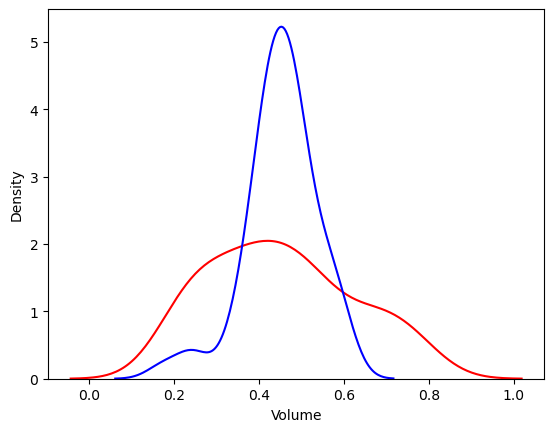

In [ ]:
##Using multiple linear regression to check the correlation 

Z = US_Corn_Production[['Annual_Precipitation','Total_Annual_Fertilizer_Use_(MT)']]

from sklearn.linear_model import LinearRegression

lm =LinearRegression()

Y = US_Corn_Production['Volume']

lm.fit(Z,Y)

Yhat=lm.predict(Z)

Yhat

#using distribution plot to compare the fitted values that result from the model and the actual values 

ax1 = sns.distplot(US_Corn_Production['Volume'],hist=False,color='r',label='Actual Value')

sns.distplot(Yhat,hist=False,color='b',label='Fitted Values',ax=ax1)

#Marks on plot

In [ ]:
#the results are not impressive 

import matplotlib.pyplot as plt

Text(0, 0.5, 'Production Volume')

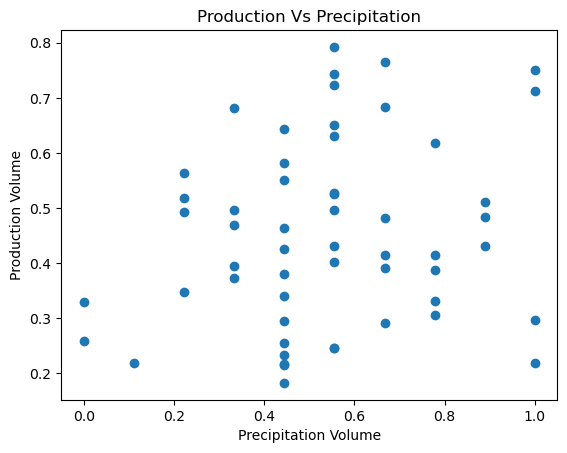

In [ ]:
#ScatterPlot - normally predictor on x 

y = US_Corn_Production['Volume']
x = US_Corn_Production['Annual_Precipitation']
plt.scatter(x,y)

plt.title("Production Vs Precipitation")
plt.xlabel("Precipitation Volume")
plt.ylabel("Production Volume")

(0.0, 0.8229773202840526)

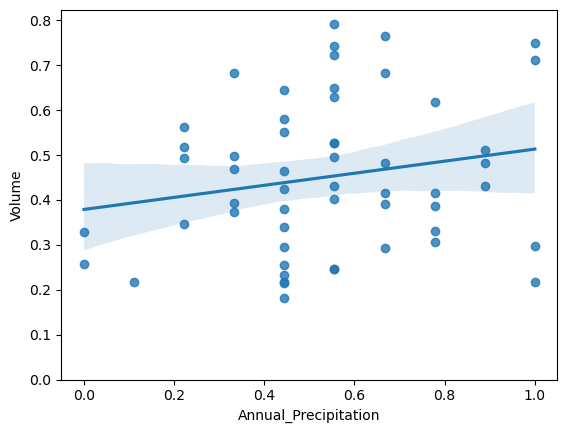

In [ ]:
sns.regplot(x = 'Annual_Precipitation', y = 'Volume',data = US_Corn_Production)
plt.ylim(0,)

(0.0, 0.8291525615542052)

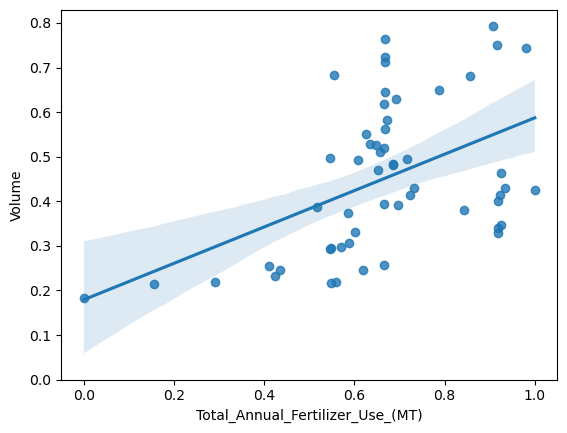

In [ ]:
#model evaluation using vizualization 

sns.regplot(x = 'Total_Annual_Fertilizer_Use_(MT)', y = 'Volume',data = US_Corn_Production)
plt.ylim(0,)

/Users/germankosenkov/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/germankosenkov/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Volume', ylabel='Density'>

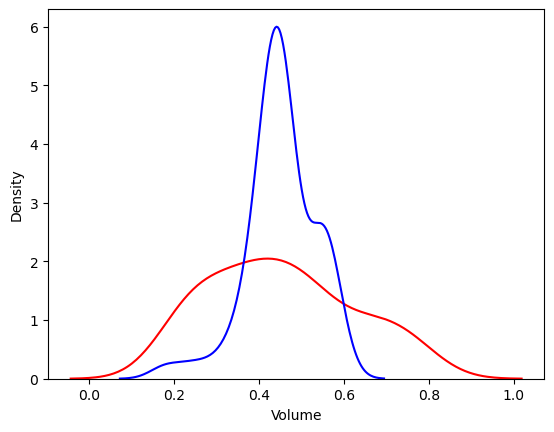

In [ ]:
#Linear Regression - testing the fit 

from sklearn.linear_model import LinearRegression

lm =LinearRegression()
X = US_Corn_Production[['Total_Annual_Fertilizer_Use_(MT)']]
Y = US_Corn_Production['Volume']

lm.fit(X,Y)

Yhat=lm.predict(X)

Yhat

ax1 = sns.distplot(US_Corn_Production['Volume'],hist=False,color='r',label='Actual Value')

sns.distplot(Yhat,hist=False,color='b',label='Fitted Values',ax=ax1)

In [ ]:
#Pearson correlation 
# Correlation coefficient - Close to +1: Large Positive, Close to -1: large negative, close to 0: no relationship
#P-value: P-value<0.001 strong certainty , P<0.05 - moderate, P< 0.1 Weak, P>0.1 no certainty\

import scipy 

from scipy import stats

pearson_coef,p_value = stats.pearsonr(US_Data_Final['Value'],US_Data_Final['total_ferts_used'])

pearson_coef,p_value

#perfect positive correlation

#conclusion: Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation. good certainty. 

NameError: name 'US_Data_Final' is not defined

In [ ]:
#pearson for precipitation - to measure the strength of the correlation 
#interpretation: close to +1 - Large positive relationship
#Close to -1 large negative
#closde to 0: No relationship




pearson_coef,p_value = stats.pearsonr(US_Data_Final['Value'],US_Data_Final['Precipitation'])

pearson_coef,p_value

#low correlation and no certainty based on p value

8.Conclusions 

In [618]:
from sklearn.model_selection import train_test_split

In [620]:
x_train,x_test,y_train,y_test = train_test_split(Z,Y,test_size=0.3,random_state=0)

x_train,x_test,y_train,y_test

(        Annual_Precipitation  Total_Annual_Fertilizer_Use_(MT)
 28821               0.444444                          0.548044
 62877               0.444444                          0.841904
 128249              0.333333                          0.651800
 167753              0.555556                          0.787577
 245155              0.000000                          0.665530
 83249               0.777778                          0.600765
 256675              0.666667                          0.722791
 162761              0.666667                          0.555450
 68009               0.777778                          0.923700
 20645               0.555556                          0.435855
 137833              0.777778                          0.665153
 73169               0.222222                          0.924697
 261643              0.666667                          0.695422
 93553               0.777778                          0.515889
 233867              0.555556           

In [ ]:
##Using multiple linear regression to check the correlation 

Z = US_Corn_Production[['Annual_Precipitation','Total_Annual_Fertilizer_Use_(MT)']]

from sklearn.linear_model import LinearRegression

lm =LinearRegression()

Y = US_Corn_Production['Volume']

lm.fit(Z,Y)

Yhat=lm.predict(Z)

Yhat

ax1 = sns.distplot(US_Corn_Production['Volume'],hist=False,color='r',label='Actual Value')

sns.distplot(Yhat,hist=False,color='b',label='Fitted Values',ax=ax1)

#Marks on plot




#training and predicting vALUES

lm.fit(Z,Y)

lm.predict(np.array)